In [1]:
%load_ext autoreload
%autoreload 2

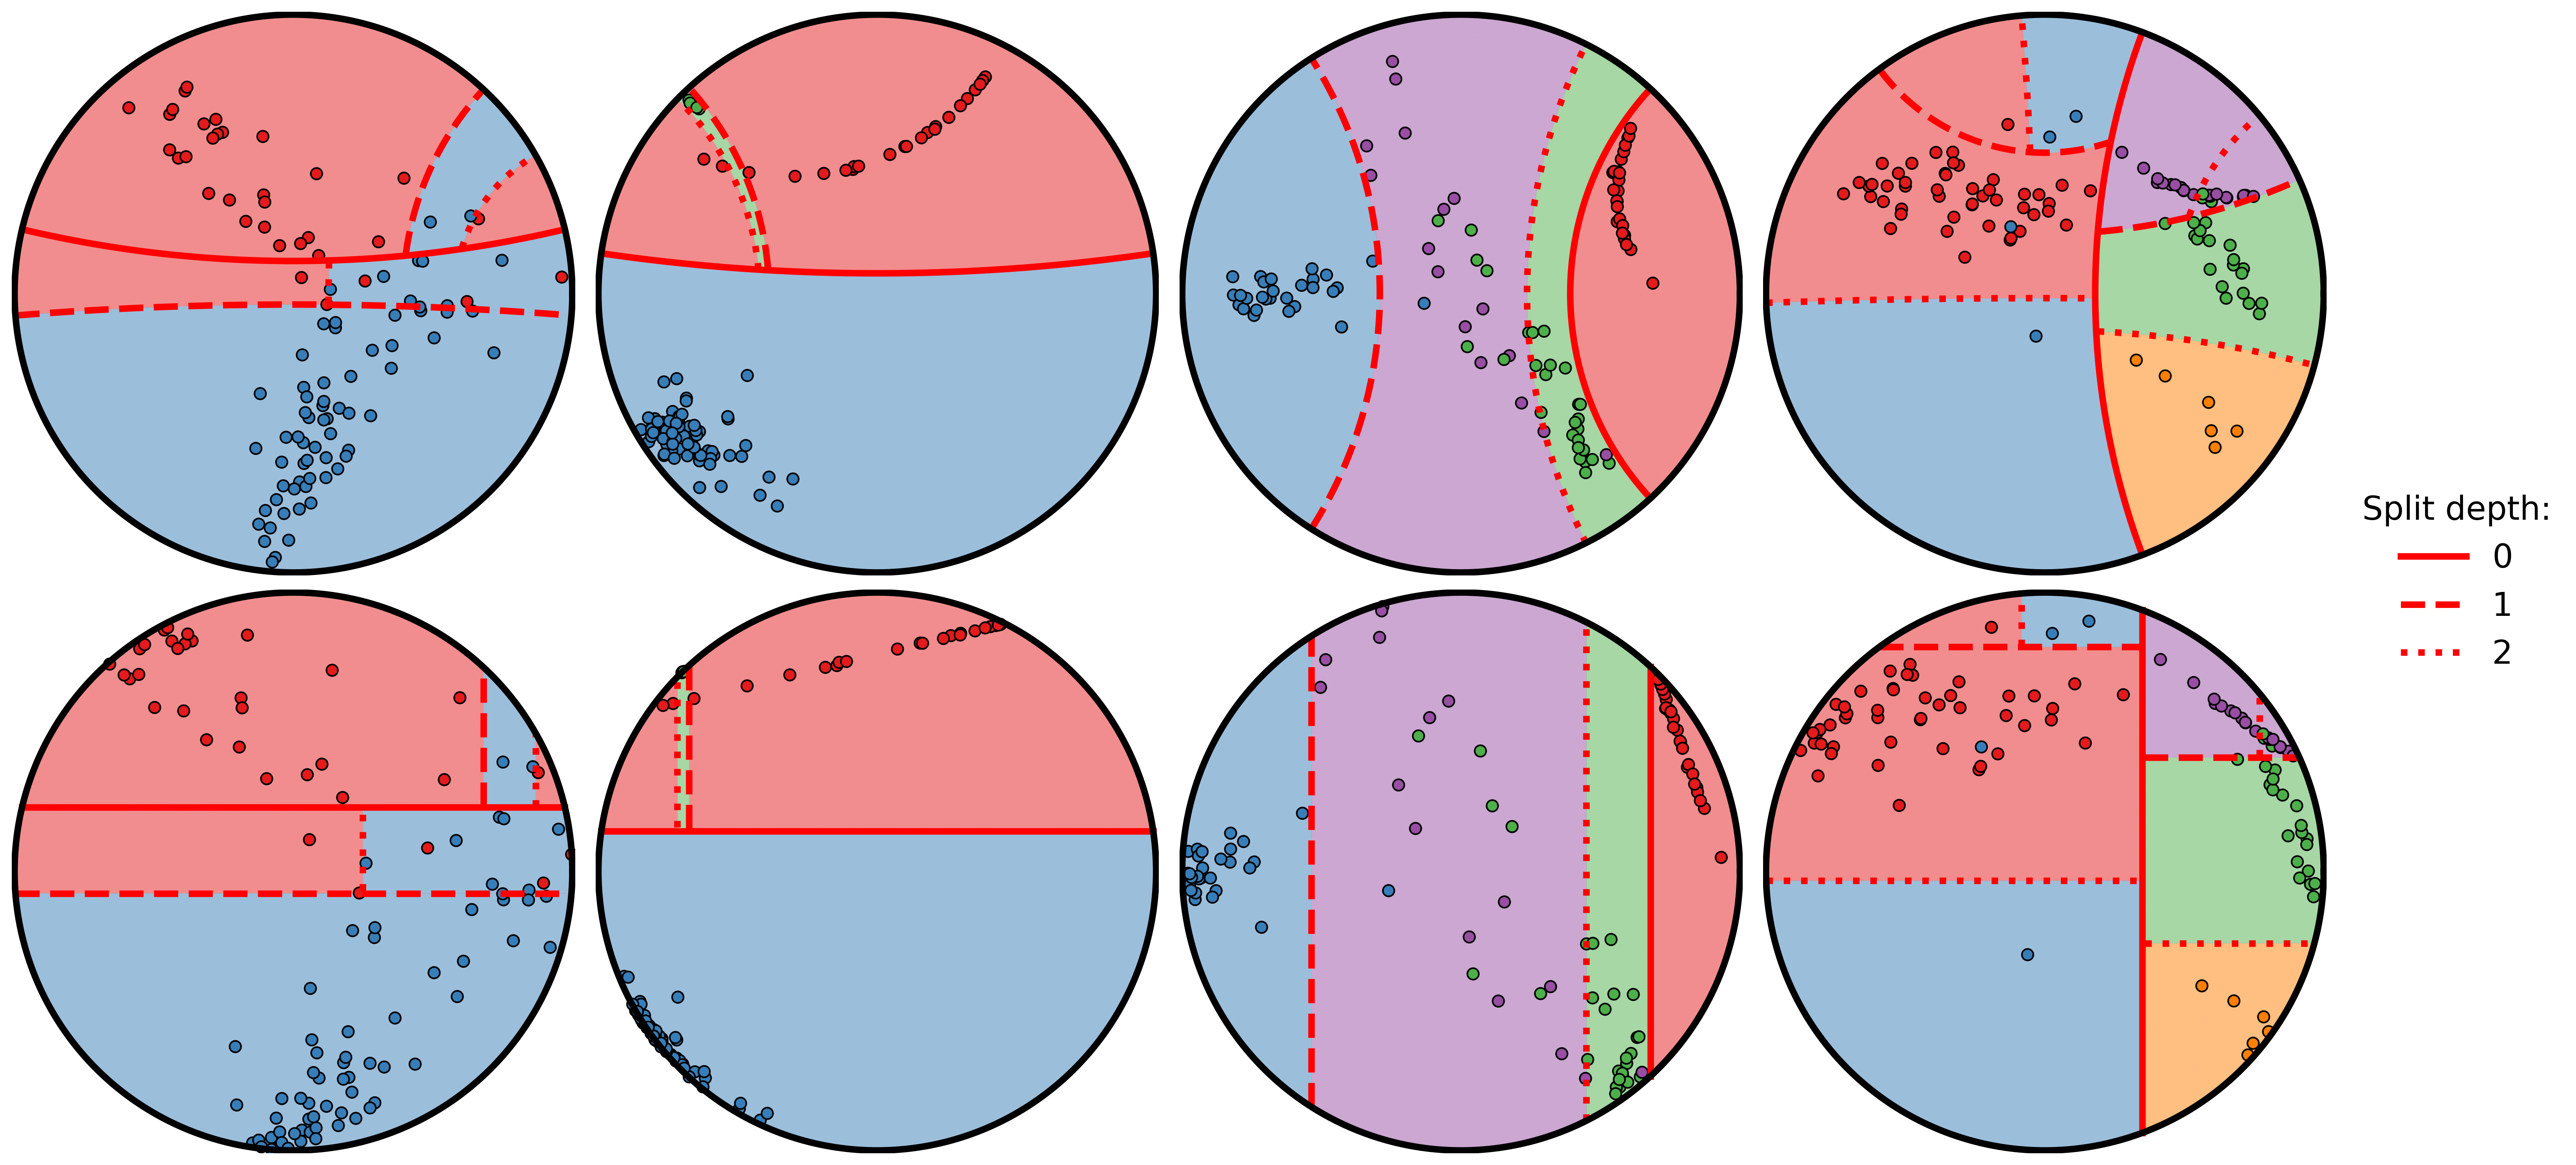

In [16]:
# Try this for 3 different seeds - this takes about a minute
import matplotlib.pyplot as plt
from hyperdt.toy_data import wrapped_normal_mixture
from hyperdt.legacy.tree import HyperbolicDecisionTreeClassifier
from hyperdt.legacy.visualization import plot_tree

fig, axs = plt.subplots(2, 4, figsize=(20, 10), dpi=300)

def hyp2klein(X):
    return X[:, 1:] / (X[:, 0:1])

# Get colors
cmap = plt.get_cmap("tab10")
set1 = [cmap(i) for i in range(5)]
for i, (ax1, ax2, seed, n_classes) in enumerate(zip(axs[0], axs[1], [6, 8, 10, 13], [2, 3, 4, 5])):
    X, y = wrapped_normal_mixture(num_points=100, num_classes=n_classes, noise_std=0.3, seed=seed)
    hdt = HyperbolicDecisionTreeClassifier(timelike_dim=0, max_depth=3)
    hdt.fit(X, y)
    for ax, geometry in zip([ax1, ax2], ["poincare", "klein"]):
        ax = plot_tree(hdt, X=X, y=y, ax=ax, geometry=geometry, class_colors=plt.get_cmap("Set1").colors[:5])
        ax.set_axis_off()
        ax.legend_ = None
        ax.set_xlim([-1.01, 1.01])
        ax.set_ylim([-1.01, 1.01])
        ax.set_aspect("equal")

        # Change line width
        for line in ax.lines:
            line.set_linewidth(4)

fig.tight_layout()

# Set fake legend
styles = ["solid", "dashed", "dotted"]
fig.legend(
    title = "Split depth:",
    handles=[plt.Line2D([0], [0], color="red", linestyle=s, label=i, lw=4) for i, s in enumerate(styles)],
    ncol=1,
    loc="center right",
    fontsize=20,
    bbox_to_anchor=(1.1, 0.5),
    frameon=False,
    title_fontsize=20,
)
plt.tight_layout()

plt.savefig("images/hdt_tree.pdf", bbox_inches="tight", dpi=300)